<a href="https://colab.research.google.com/github/Skula33/FDSfE_SKulakowski/blob/main/HW4/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing our Packages:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2020_FBianco/master/data/walkingsped_Bettencourt07.csv", 
                   header=None, names=["population", "wspeed"])

df.head()

,population,wspeed
0,2520.0,2.28
1,370.0,2.79
2,5650.0,3.37
3,14100.0,3.76
4,23300.0,3.31


In [3]:
df['population_log'] = np.log10(df['population'])

coefs = np.polyfit(df['population_log'], df['wspeed'], 1)
coefs

array([0.8653381 , 0.05664889])

# <mark>WFF</mark> Missing the brute force method of linear regression where you minimize the object function with for loops.

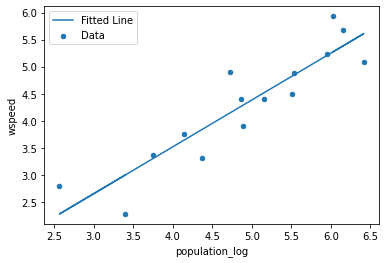

In [4]:
ax = df.plot(x="population_log", y="wspeed", kind="scatter", label = 'Data');

ax.plot(df['population_log'], df['population_log']*coefs[0] + coefs[1], label = 'Fitted Line');
ax.legend();

### Firgure 1: Linear Fit Model to Data: Polyfit

I may have jumped the gun here with my plot. Initially we would want this to be a sort of 'Exploratory Analysis' by only plotting our dependent vs. independent variables. I included our line of best fit calculated by numpy.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


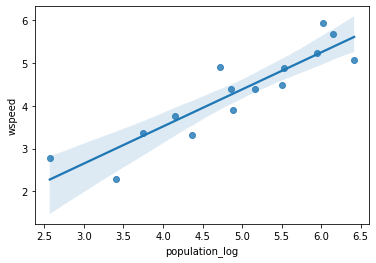

In [5]:
sns.regplot(df['population_log'], df['wspeed'])
plt.show();

### Figure 2: Linear Fit Model: Seaborn 95% CI

# <mark>WFF</mark> This figure caption should be more descriptive. Remember that a figure caption should explain both what the plot is about, and why it is important.

# Sci-Kit Learn: Fitting Linear Model

Here we are defining a function to double check the sum of squared error is proper. We can use this function within another function, r2, to also double check the $R^2$ value of each regressional model.

In [6]:
def sumsqerror(y, yp):
  return ((y - yp) ** 2).sum()

def r2(y, yp):
  num = sumsqerror(y, yp)
  den = ((y - np.mean(y))**2).sum()
  return(1 - num/den)

In [7]:
df['prediction'] = df['population_log']*coefs[0] + coefs[1]

sumsqerror(df['wspeed'], df['prediction'])

2.758155314005622

In [8]:
lm = LinearRegression()
X = np.array(df['population_log']).reshape(-1,1)
y = np.array(df['wspeed']).reshape(-1,1)
lm.fit(X, y)

y_preds = lm.predict(X)
sumsqerror(y, y_preds)

2.7581553140056205

In [9]:
sk_coefs = []
sk_coefs.append(lm.coef_[0])
sk_coefs.append(lm.intercept_[0])
sk_coefs

[array([0.8653381]), 0.05664889151453334]

In [10]:
lm.score(X, y)

0.8216814457855732

In [11]:
# Double checking our model score from SciKit-Learn with our defined mathematic formula
r2(y, y_preds)

0.8216814457855732

## StatsModels:

In [12]:
# Let's redefine our values for X and y
X = df['population_log']
y = df['wspeed']

X = sm.add_constant(X)
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,population_log
0,1.0,3.401401
1,1.0,2.568202
2,1.0,3.752048
3,1.0,4.149219
4,1.0,4.367356


In [13]:
Statsmodel = sm.OLS(y, X).fit()
Statsmodel.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wspeed   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     59.90
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           3.21e-06
Time:                        13:35:18   Log-Likelihood:                -8.5829
No. Observations:                  15   AIC:                             21.17
Df Residuals:                      13   BIC:                             22.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0566      0.560      0.101      0.921      -1.154       1.267
population_log     0.8653      0.112      7.740      0.000       0.624       1.107
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.531
Skew:                           0.115   Prob(JB):                        0.767
Kurtosis:                       2.107   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Statsmodels Formula Method:

In [14]:
import statsmodels.formula.api as smf

In [15]:
statsForm = smf.ols(formula = 'wspeed ~ population_log', data = df).fit()
statsForm.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wspeed   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     59.90
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           3.21e-06
Time:                        13:35:18   Log-Likelihood:                -8.5829
No. Observations:                  15   AIC:                             21.17
Df Residuals:                      13   BIC:                             22.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0566      0.560      0.101      0.921      -1.154       1.267
population_log     0.8653      0.112      7.740      0.000       0.624       1.107
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.531
Skew:                           0.115   Prob(JB):                        0.767
Kurtosis:                       2.107   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
pred_y = statsForm.predict(df['population_log'])
pred_y

0     3.000010
1     2.279012
2     3.303439
3     3.647126
4     3.835888
5     4.141898
6     4.266609
7     4.285603
8     4.522977
9     4.820465
10    4.844352
11    5.207408
12    5.610650
13    5.380458
14    5.274104
dtype: float64

In [17]:
#sumsqerror(y, pred_y)
r2(y, pred_y)

0.8216814457855732

In [18]:
# fitting a quadratic model with the same package!
statsFormQ = smf.ols(formula = 'wspeed ~ np.power(population_log, 2) + population_log', data = df).fit()
statsFormQ.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wspeed   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     28.41
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           2.81e-05
Time:                        13:35:18   Log-Likelihood:                -8.4158
No. Observations:                  15   AIC:                             22.83
Df Residuals:                      12   BIC:                             24.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.0889      2.067      0.527      0.608      -3.415       5.593
np.power(population_log, 2)     0.0513      0.099      0.520      0.613      -0.164       0.266
population_log                  0.3916      0.918      0.426      0.677      -1.609       2.392
==============================================================================
Omnibus:                        0.026   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.238
Skew:                           0.051   Prob(JB):                        0.888
Kurtosis:                       2.392   Cond. No.                         507.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Comparing our StatsModels:

In [19]:
y_pred_quad = statsFormQ.predict(X)
sumsqerror(y, y_pred_quad)

2.69737341649744

Our sum squared error is lower for our quadratic model, so that may imply that the quadratic fit may provide a better prediction given this dataset. But as mentioned in class, we see that our adjusted $R^2$ is lower than that of our initial linear model, meaning that this more complex model, while the $R^2$ is greater, doesn't do a better job in explaining the variance of the dataset.

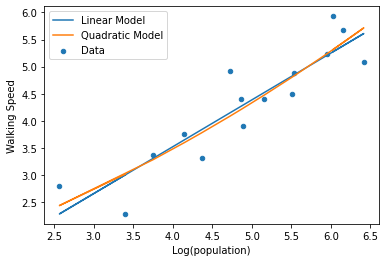

In [20]:
ax = df.plot("population_log", "wspeed", kind="scatter", label = 'Data')
ax.plot(df['population_log'], y_preds, label = 'Linear Model')
ax.plot(df['population_log'], y_pred_quad, label = 'Quadratic Model')
plt.xlabel('Log(population)')
plt.ylabel('Walking Speed');
plt.legend();

### Figure 3: Comparing Our StatsModels

In [21]:
statsFormQ.compare_lr_test(statsForm)

(0.3342540144461843, 0.5631648421666332, 1.0)

Once again with a statistical comparison between these two models. What does this output tell us?? Well, we can go ahead and state that with a standard representation of $\alpha = 0.05$ we aquire a likelihood ratio statistic:

$$
D = -2 log \left(\frac{ \mathcal{L}_{null} }{ \mathcal{L}_{alternative}} \right)
$$

Where our $D$ represents a statistic within the $\chi^2$ distribution and essentially compares the likelihoods of the two models.

Our $D = 0.33$ with a respective p-value of 0.56. This p-value essentially tells us that we would fail to reject the null hypothesis that the more complex model tells a better story about the data than that of our simpler one. 

In conclusion, this test tells us that our linear model is a better representation of our data than that of our quadratic model.

## Uncertainty:

In [22]:
# Output our coefficients
statsForm.params

Intercept         0.056649
population_log    0.865338
dtype: float64

In [23]:
# What is the 95% ci of each coefficient
statsForm.conf_int()

,0,1
Intercept,-1.153880,1.267177
population_log,0.623798,1.106878


In [24]:
st, data, ss2 = summary_table(statsForm, alpha=0.05)
data.shape

(15, 12)

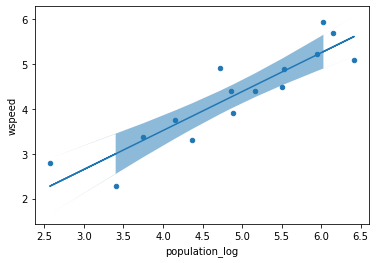

In [25]:
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,4:6].T
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
ax = df.plot("population_log", "wspeed", kind="scatter")
ax.plot(df.population_log, statsForm.predict(df));
ax.fill_between(df.population_log.values, predict_ci_low, predict_ci_upp, alpha=0.5);

### Figure 4: 95% Confidence Interval Modeled

What did we do here? Essentially we decided to reciprocate the same figure that we generated with seaborn. This gives us the 95% confidence interval of the model over the given domain in our predictions utilizing the ci of each of our coefficients. 

## Influence Points:

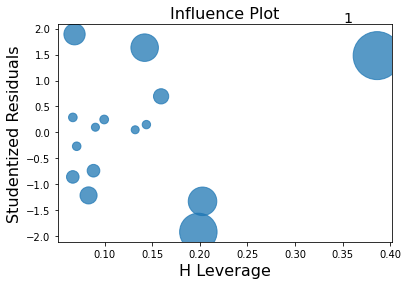

In [26]:
sm.graphics.influence_plot(statsForm);

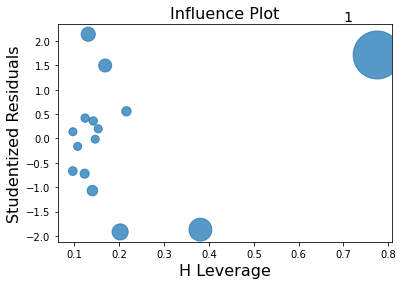

In [27]:
sm.graphics.influence_plot(statsFormQ);

This function creates a “bubble” plot of Studentized residuals versus hat leverage values. The influence plot helps you identify data points that might have strong influence over the model fit. Unusual data points can be unusual because they have an unusual X values (at the edge of the distribution), or because their y value is an "outlier". Points that are both are on the top right of the plot and are high influence points. The influence of the point measured as Cook's distance is represented by the size of the bubble.